# 1. Sampling

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math
import numpy as np

In [11]:
def load(file_path):
    with open(file_path, 'r') as file:
        text = file.read()
        lines = text.split("\n")
        data = [tuple(map(float, line.split())) for line in lines if line.strip()]
    variables = list(zip(*data))

    return variables

## 1.1 Sampling random points within D- dimensional domains by hit and miss

In order to sample points from a rectangle and a circle, I have implemented a script in C++ (**ex1.1.cpp** in attachment) that allows to choose the figure, its parameters (width and height coordinates for the rectangle and coordinates of center and radius for the circle) and the number of points to sample, and that returns the coordinates of hit and missed points.
In fact, first of all the samples $(x,y)$ are generated by the uniform distribution $U(a,b)$, then they are accepted only if they fall inside the chosen figure, using the two conditions:
* **Square**: $\{(x,y) \quad \textit{such that:} \quad a \le x \le b \quad and \quad c \le y \le d \}$
* **Circle**: $\{(x,y) \quad \textit{such that:} \quad \sqrt{(x-\alpha)^2+(y-\beta)^2} \le r \},\qquad a=-r+\alpha, \quad b = r+\alpha, \quad c=-r+\beta, \quad d = r + \beta$.

The area of the two figure is then estimated using:
$$
A_{HM} = (b-a)(d-c) \frac{\# \textit{n accepted throws}}{\# \textit{n total throws}}
$$
and confronted with the true theoretical areas.

In [12]:
# Load lists of hit and miss points coordinates for each total number of throws
def load_in_out(ty, m):
    green = [load("type{}_in{}.txt".format(ty,ni)) for ni in m]
    red = [load("type{}_out{}.txt".format(ty,ni)) for ni in m]
    return green, red

# Estimate of area using Monte Carlo hit and miss
def area(a, b, c, d, hit, miss):
    return (b-a) * (d-c) * hit/(miss+hit)

### Rectangle

In [13]:
# Load utilities to show examples
n = [100, 1000, 10000]
params = [(0,1,0,1),(1,3,2,5),(0,5,3,10)]
green, red = load_in_out(0, n)
th_area = [(b-a)*(d-c) for (a,b,c,d) in params]

Given (a,b,c,d)=(0, 1, 0, 1), the analytical area is 1
For 100 throws, the area is 1.0, with a percentage error of 0.0%

Given (a,b,c,d)=(1, 3, 2, 5), the analytical area is 6
For 1000 throws, the area is 6.0, with a percentage error of 0.0%

Given (a,b,c,d)=(0, 5, 3, 10), the analytical area is 35
For 10000 throws, the area is 35.0, with a percentage error of 0.0%



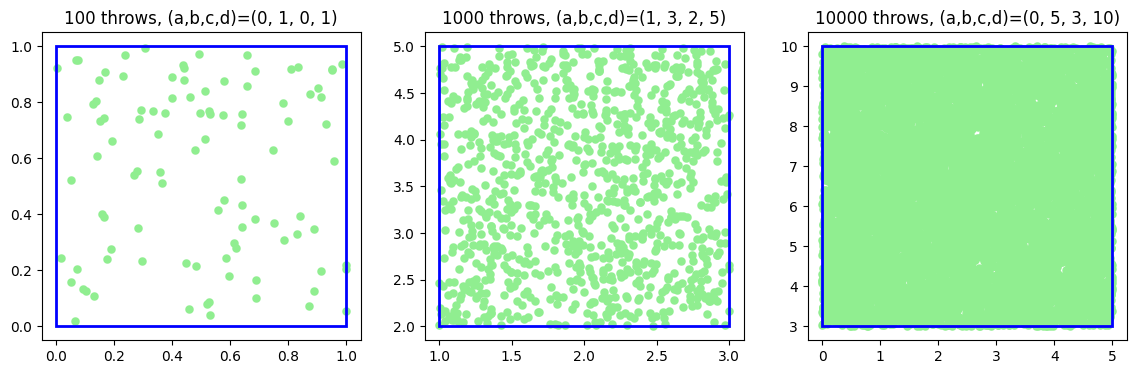

In [14]:
# Plot results
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(14,4))
for i,num in enumerate(n):
    a, b, c, d = params[i]
    xs_in, ys_in = green[i][0], green[i][1]
    xs_out, ys_out = red[0], red[1] # index removed because the two lists are empty
    exp_area = area(a, b, c, d, len(xs_in), len(xs_out))
    print(f"Given (a,b,c,d)={params[i]}, the analytical area is {round(th_area[i],4)}")
    print(f"For {num} throws, the area is {round(exp_area,4)}, with a percentage error of {round(abs(exp_area - th_area[i])/th_area[i]*100,2)}%\n")
    ax[i].scatter(xs_in, ys_in, linewidths=0.1, color="lightgreen")
    ax[i].scatter(xs_out, ys_out, linewidths=0.1, color="red")
    rectangle = patches.Rectangle((a, c), (b-a), (d-c), fill=False, color="blue", linewidth=2, label="square")
    ax[i].add_patch(rectangle)
    ax[i].set_title(f"{num} throws, (a,b,c,d)={params[i]}")
plt.show()

As expected, all points fall inside the requested rectangle shape, returning the area with 100% accuracy.

### Circle

In [15]:
# Load utilities to show examples
n_c = [1000,5000,10000]
params_c = [(0,0,1),(-1,2,5),(-3,1,10)]
green_c, red_c = load_in_out(1, n_c)
th_area_c = [r**2*math.pi for (alpha,beta,r) in params_c]

Given (alpha,beta,r)=(0, 0, 1), the analytical area is 3.1416
For 1000 throws, the area is 3.088, with a percentage error of 1.71%

Given (alpha,beta,r)=(-1, 2, 5), the analytical area is 78.5398
For 5000 throws, the area is 78.12, with a percentage error of 0.53%

Given (alpha,beta,r)=(-3, 1, 10), the analytical area is 314.1593
For 10000 throws, the area is 311.96, with a percentage error of 0.7%



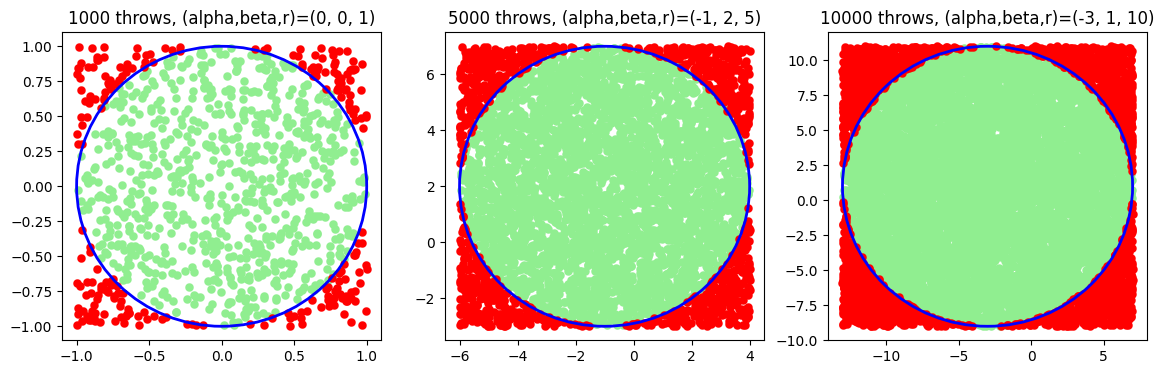

In [16]:
# Plot results
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(14,4))
for i,num in enumerate(n_c):
    alpha, beta, r = params_c[i]
    a = alpha - r
    b = alpha + r
    c = beta - r
    d = beta + r
    xc_in, yc_in = green_c[i][0], green_c[i][1]
    xc_out, yc_out = red_c[i][0], red_c[i][1]
    exp_area = area(a,b,c,d,len(xc_in),len(xc_out))
    print(f"Given (alpha,beta,r)={params_c[i]}, the analytical area is {round(th_area_c[i],4)}")
    print(f"For {num} throws, the area is {round(exp_area,4)}, with a percentage error of {round(abs(exp_area - th_area_c[i])/th_area_c[i]*100,2)}%\n")
    ax[i].scatter(xc_in, yc_in, linewidths=0.1, color="lightgreen")
    ax[i].scatter(xc_out, yc_out, linewidths=0.1, color="red")
    circle = patches.Circle((alpha, beta), r, fill=False, color="blue", linewidth=2, label="circle")
    ax[i].add_patch(circle)
    ax[i].set_title(f"{num} throws, (alpha,beta,r)={params_c[i]}")
plt.show()

These examples demonstrate that the area of a circle can be obtained with acceptable accuracy using hit and miss Monte Carlo. They also highlight the importance of increasing the number of throws together with the analytical area: in fact, the third circle is sampled using twice the number of points as the second one, however, its area error is higher because the analytical area is four times larger.

 ## Sampling random numbers from a given distribution

## 1.2-3 Inversion method I & II

In order to sample points from a power pdf with power $n$ and sampling interval $[0,a]$ as parameters, I have implemented a C++ script (**ex1.2.cpp**, in attachment) that allows to take in input $n$, $a$ and the number of throws and returns the desired samples using the inverse sampling technique.

In fact, given:
$$
\rho(x) = c \cdot x^n
$$
It is possible to find the corresponding CDF by integration:
$$
F(x) = c \cdot \frac{x^{n+1}}{n+1}
$$
and imposing the normalization for $x \in [ 0,a ]$: 
$$
c = (n+1) \cdot {a}^{-(n+1)}
$$
Therefore, the resulting CDF and its inverse are:
$$
F(x) = {a}^{-(n+1)} \cdot x^{n+1} \\
F^{-1}(\xi) = \sqrt[n+1]{\xi \cdot a^{n+1}}
$$

where $\xi$ is generated from a uniform distribution $U(0,1)$ and $F^{-1}(\xi)$ generates the desired samples.

In [17]:
# Probability Density Function with the correct normalization factor
def pdf(x,n,a):
    # n is the power, a the left limit of sampling interval [0,a]
    c = (n+1)*a**(-(n+1)) # general normalization factor
    return c*x**n

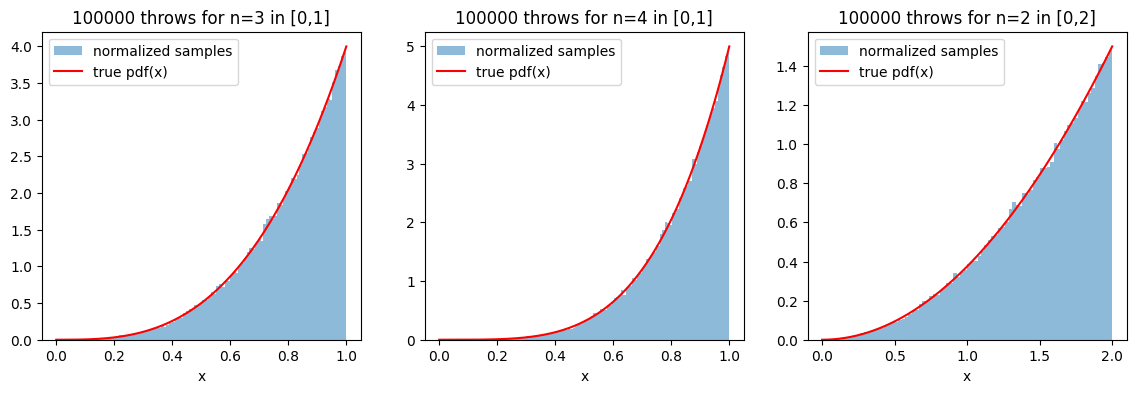

In [18]:
# Show results
p = [3, 4, 2]
i_ = [1, 1, 2]
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(14,4))
for j, pw in enumerate(p):
    samples = load("inv_sampling_n{}_100000_{}.txt".format(pw,i_[j]))
    x_range = np.linspace(0, i_[j], 1000)
    y_range = pdf(x_range,pw,i_[j])
    ax[j].hist(samples, bins="auto", density=True, alpha=0.5, label="normalized samples")
    ax[j].plot(x_range, y_range, color="red", label="true pdf(x)")
    ax[j].set_title(f"100000 throws for n={pw} in [0,{i_[j]}]")
    ax[j].set_xlabel("x")
    ax[j].legend()
plt.show()

As requested, the chosen parameters where $n=3,4$ for $[0,1]$ interval and $n=2$ for $[0,2]$ interval. The resulting samples are aggregated as normalized histograms: in this way it can be observed that their shapes match the required pdfs.